In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split # use only 30% of training data 

In [2]:
data=np.load("D:\Machine Learning Bootcamp\Projects\KNN and HandWritten Classification Projects\mnist_train_small.npy")
#Loading of the data

In [3]:
X = data[:, 1:]  
y = data[:, 0]

In [4]:
X.shape, y.shape

((19999, 784), (19999,))

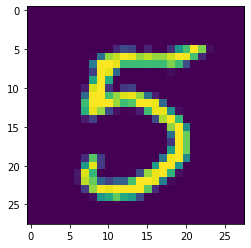

In [5]:
plt.imshow(X[0].reshape(28, 28)) # we are reshaping into 2D matrix (28*28=784)
#here 19999 images, the first i.e.,x[0] is 5

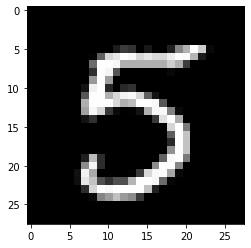

In [6]:
plt.imshow(X[0].reshape(28, 28),cmap='gray')

In [7]:
y[0] # Answer of y 

5

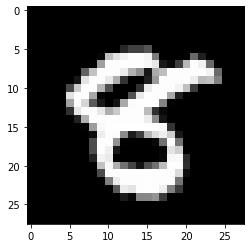

In [10]:
plt.imshow(X[657].reshape(28, 28),cmap='gray')

In [12]:
y[657]

8

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
model = KNeighborsClassifier() # Create Object of this class

In [16]:
# training the model happens in fit function
# plotting the points on the graph
# no work is happening in traingin knn model
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [17]:
model.predict(X_test[:10]) # Predicted the First data is 1

array([1, 7, 0, 9, 4, 5, 4, 6, 9, 2], dtype=uint8)

In [18]:
y_test[:10] # Its showing the actual Value

array([7, 7, 0, 9, 4, 5, 4, 6, 9, 2], dtype=uint8)

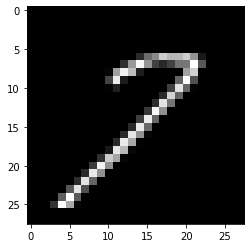

In [19]:
plt.imshow(X_test[0].reshape(28, 28), cmap='gray') #Its showing 1 but actual it is 7

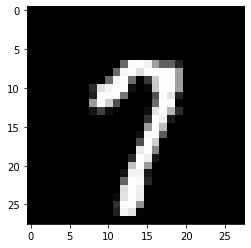

In [20]:
plt.imshow(X_test[1].reshape(28, 28), cmap='gray') #Its actual and predicted both are same i.e. 7

In [21]:
model.score(X_test[:100], y_test[:100]) # Its showing the accuracy between actual and predicted model

0.95

In [23]:
# k-nearest neighbors algorithm
# Most of the things around you will tell you the result
x,y = make_blobs(n_samples=100,centers=3,random_state=42) # random_state=42 will give the same data

'1)Take distance of given point from each Point\n2) Sort all the distance\n3)Suppose [distance,class]= [[4,G],[6.R],[7.G],[9,G],[12,B]]-K-nearest neighbours\nG-3,R-1,B-1, So G are more, therefore we are belongs to G class'

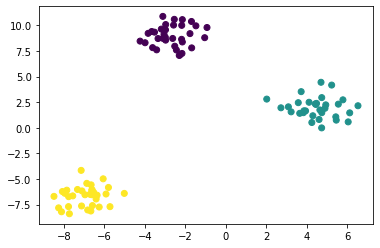

In [24]:
  plt.scatter(x[:,0],x[:,1],c=y)
'''1)Take distance of given point from each Point
2) Sort all the distance
3)Suppose [distance,class]= [[4,G],[6.R],[7.G],[9,G],[12,B]]-K-nearest neighbours
G-3,R-1,B-1, So G are more, therefore we are belongs to G class'''


<h1> Custom KNN - Our own KNN implementation Object Oriented </h1>

In [25]:
class CustomKNN:
    # constructor
    def __init__(self, n_neighbours=5):
        self.n_neighbours = n_neighbours
        
    # training function
    def fit(self, X, y):
        self._X = (X - X.mean()) / X.std() # standardisation Formula 
        self._y = y
    
    # predict point
    # given a single point, tell me which class it belongs to 
    def predict_point(self, point):
        # storing the dis of given 'point' from each point in training data
        list_dist = []
        
        # these points are from my training data
        for x_point, y_point in zip(self._X, self._y):
            dist_point = ((point - x_point) ** 2).sum()
            list_dist.append([dist_point, y_point])
        
        ## sorting the list according to the distance
        sorted_dist = sorted(list_dist)
        top_k = sorted_dist[:self.n_neighbours]
        
        # taking the count 
        items, counts = np.unique(np.array(top_k)[:, 1], return_counts=True)
        ans = items[np.argmax(counts)]
        return ans
            
    # predict
    # give me answer for each number in the array
    def predict(self, X):
        results = []
        X = (X - X.mean()) / X.std() 
        for point in X:
            results.append(self.predict_point(point))
        return np.array(results, dtype=int)
    
    # score to measure my accuracy
    def score(self, X, y):
        return sum(self.predict(X) == y) / len(y)

In [26]:
m2 = CustomKNN()

In [27]:
m2.fit(X_train, y_train)

In [28]:
m2.predict(X_test[:10])

array([1, 7, 0, 9, 4, 5, 4, 6, 9, 2])

In [29]:
y_test[:10]

array([7, 7, 0, 9, 4, 5, 4, 6, 9, 2], dtype=uint8)

In [32]:
m2.score(X_test[:100], y_test[:100])

0.95

<h1> Demo of our own KNN Algorithm </h1>

In [33]:
li = [ 
    [23, 0],
    [45, 1],
    [19, 0],
    [3, 2],
    [10, 0],
    [34, 2],
    [100, 1]
]

In [34]:
sorted_li = sorted(li)

In [35]:
top_k = sorted_li[:5]

In [36]:
top_k

[[3, 2], [10, 0], [19, 0], [23, 0], [34, 2]]

In [37]:
li, counts = np.unique(np.array(top_k)[:, 1], return_counts=True)

In [38]:
li, counts

(array([0, 2]), array([3, 2], dtype=int64))

In [39]:
counts

array([3, 2], dtype=int64)